## Prediction of diabates using Machine learning Algorithm

## Step 1: Have to import all the libraries which is required for your project


In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt

## Step 2: Load the data

In [2]:
df=pd.read_excel("pima-data.xlsx")

In [3]:
df.shape

(768, 12)

## Step 3: Cleaning the data

## a) Check any null values or NaN values are available or not in the data set 

In [4]:
df.isnull()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False,False,False


## to check whether any null value is present or not. If null value is available "True" will be the output

In [5]:
df.isnull().values.any() 

False

## if null values are available in my data set, then we have to use "dropna"(to drop the null value) or "fill na"(to fill the null value)

## b) find the co-relation between the columns

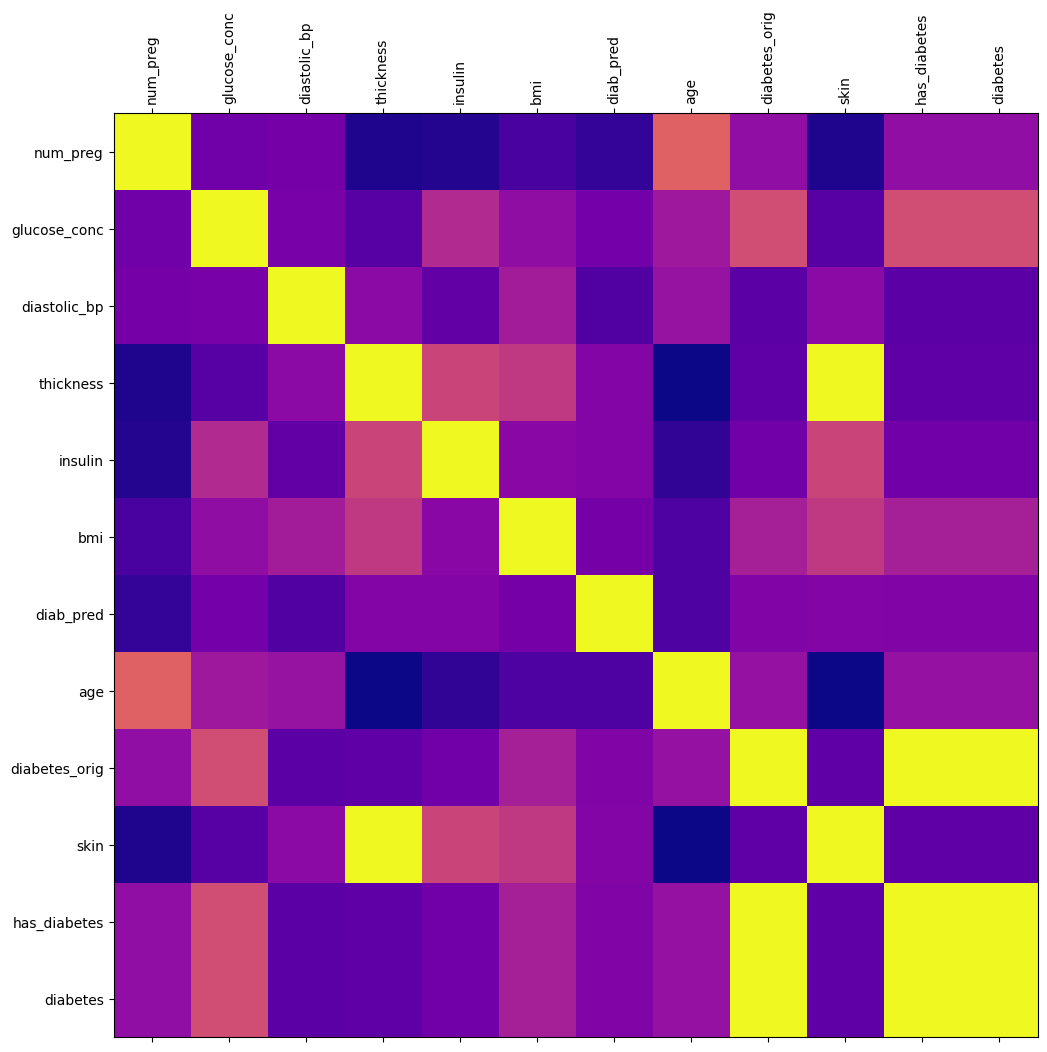

In [6]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(12,12))
cmap='plasma'
ax.matshow(corr,cmap=cmap)
plt.xticks(range(len(corr.columns)),corr.columns,rotation=90)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

In [7]:
## drop the corelated columns
df.drop('thickness',axis=1,inplace=True)

In [9]:
df.drop('diabetes_org',axis=1,inplace=True)

KeyError: "['diabetes_org'] not found in axis"

In [10]:
df.drop('has_diabetes',axis=1,inplace=True)

In [11]:
df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,diabetes_orig,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1,1.3790,True
1,1,85,66,0,26.6,0.351,31,0,1.1426,False
2,8,183,64,0,23.3,0.672,32,1,0.0000,True
3,1,89,66,94,28.1,0.167,21,0,0.9062,False
4,0,137,40,168,43.1,2.288,33,1,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0,1.8912,False
764,2,122,70,0,36.8,0.340,27,0,1.0638,False
765,5,121,72,112,26.2,0.245,30,0,0.9062,False
766,1,126,60,0,30.1,0.349,47,1,0.0000,True


## C) In diabetes column replace Flase has 0 and True as 1

In [12]:
dict1={'diabetes':[True,False]}
dict2={'diabetes':[1,0]}
df.replace(dict1,dict2,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1040\456057825.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(dict1,dict2,inplace=True)


In [13]:
df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,diabetes_orig,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1,1.3790,1
1,1,85,66,0,26.6,0.351,31,0,1.1426,0
2,8,183,64,0,23.3,0.672,32,1,0.0000,1
3,1,89,66,94,28.1,0.167,21,0,0.9062,0
4,0,137,40,168,43.1,2.288,33,1,1.3790,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0,1.8912,0
764,2,122,70,0,36.8,0.340,27,0,1.0638,0
765,5,121,72,112,26.2,0.245,30,0,0.9062,0
766,1,126,60,0,30.1,0.349,47,1,0.0000,1


## d)Finding the proportion value for the output data.

In [14]:
num_true=len(df.loc[df['diabetes']==1])
num_false=len(df.loc[df['diabetes']==0])
print(f'num_true={num_true}')
print(f'num_false={num_false}')
per_num_true=(num_true/(num_true+num_false))*100
print(per_num_true)
per_num_false=(num_false/(num_true+num_false))*100
print(per_num_false)

num_true=268
num_false=500
34.89583333333333
65.10416666666666


## Step 4: Split the Data for Testing and Training

In [15]:
from sklearn.model_selection import train_test_split #(scikit-learn softwaree) - sklearn software is used for split, test and train the data

In [16]:
input_columns=["num_preg","glucose_conc","diastolic_bp","insulin","bmi","diab_pred","age","diabetes_orig","skin"]
output_columns=["diabetes"]

x=df[input_columns].values
y=df[output_columns].values

split_test_size=0.3
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = split_test_size,random_state=42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(537, 9)
(231, 9)
(537, 1)
(231, 1)


In [18]:
print('{0:0.2f}% in training set'.format((len(x_train)/(len(df.index))*100)))
print('{0:0.2f}% in training set'.format((len(x_test)/(len(df.index))*100)))

69.92% in training set
30.08% in training set


In [19]:
print('training true:{0} ({1:0.2f}%)'.format(len(y_train[y_train[:]==1]),(len(y_train[y_train[:]==1])/len(y_train)*100)))
print('training false:{0} ({1:0.2f}%)'.format(len(y_train[y_train[:]==0]),(len(y_train[y_train[:]==0])/len(y_train)*100)))
print('test true:{0} ({1:0.2f}%)'.format(len(y_test[y_test[:]==1]),(len(y_test[y_test[:]==1])/len(y_train)*100)))
print('test false:{0} ({1:0.2f}%)'.format(len(y_test[y_test[:]==0]),(len(y_test[y_test[:]==0])/len(y_train)*100)))

training true:188 (35.01%)
training false:349 (64.99%)
test true:80 (14.90%)
test false:151 (28.12%)


## Need to find the Zero value in each column and Fill that column area with Mean or Median or Mode value

In [20]:
total_num_preg=len(df.loc[df['num_preg']==0])
print(f'number of Rows missing in num_preg columns is {total_num_preg}')

total_glucose_conc=len(df.loc[df['glucose_conc']==0])
print(f'number of Rows missing in glucose_conc columns is {total_glucose_conc}')

total_diastolic_bp=len(df.loc[df['diastolic_bp']==0])
print(f'number of Rows missing in diastolic_bp columns is {total_diastolic_bp}')

total_insulin=len(df.loc[df['insulin']==0])
print(f'number of Rows missing in insulin columns is {total_insulin}')

total_bmi=len(df.loc[df['bmi']==0])
print(f'number of Rows missing in bmi columns is {total_bmi}')

total_diab_pred=len(df.loc[df['diab_pred']==0])
print(f'number of Rows missing in diab_pred columns is {total_diab_pred}')

total_age=len(df.loc[df['age']==0])
print(f'number of Rows missing in age columns is {total_age}')

total_diabetes_orig=len(df.loc[df['diabetes_orig']==0])
print(f'number of Rows missing in diabetes_orig columns is {total_diabetes_orig}')

total_skin=len(df.loc[df['skin']==0])
print(f'number of Rows missing in skin columns is {total_skin}')

number of Rows missing in num_preg columns is 111
number of Rows missing in glucose_conc columns is 5
number of Rows missing in diastolic_bp columns is 35
number of Rows missing in insulin columns is 374
number of Rows missing in bmi columns is 11
number of Rows missing in diab_pred columns is 0
number of Rows missing in age columns is 0
number of Rows missing in diabetes_orig columns is 500
number of Rows missing in skin columns is 227


## We can handle Zeros or Empty values by using Scikit learn software,from impute module and import simpleImputer class

## From scikit learn Library,  impute module import SimpleImputer class

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
fill_0=SimpleImputer(missing_values=0,strategy='mean')
x_train=fill_0.fit_transform(x_train)
x_test=fill_0.fit_transform(x_test)

In [24]:
x_train[0:3]

array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 5.80000000e+01,
        2.39000000e+01, 2.60000000e-01, 2.20000000e+01, 1.00000000e+00,
        7.09200000e-01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 3.25000000e+02,
        3.69000000e+01, 1.59000000e-01, 2.80000000e+01, 1.00000000e+00,
        1.14260000e+00],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 2.50000000e+02,
        4.23000000e+01, 3.65000000e-01, 2.40000000e+01, 1.00000000e+00,
        1.65480000e+00]])

## Step 5: Training the Model

## Start the training for Machine Learning Model by importing naive bayes, Random forest, Linear regression algorithm.

In [25]:
from sklearn.naive_bayes import GaussianNB #from sklearn library, from naivebayes module import gaussianNB class

In [26]:
nb_model=GaussianNB() #Creating object for GaussianNB Class
nb_model.fit(x_train,y_train.ravel()) #Training a model

GaussianNB()

In [44]:
from sklearn import metrics

nb_predict_model=nb_model.predict(x_train) # Testing a model
print(f'Predicted accuracy {metrics.accuracy_score(y_train,nb_predict_model) }') #Accuracy

Predicted accuracy 0.7541899441340782


In [45]:
nb_predict_model

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [33]:
from sklearn import metrics

nb_predict_test=nb_model.predict(x_test) # Testing a model
print('Predicted accuracy:{0:.4f}'.format(metrics.accuracy_score(y_test,nb_predict_test))) #Accuracy

Predicted accuracy:0.7359
